# Pymaceuticals inc.

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "module_5_starter_code_unzipped/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "module_5_starter_code_unzipped/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_study_df = pd.merge( study_results, mouse_metadata, how="left", on=["Mouse ID"])

mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [143]:
len(mouse_study_df["Mouse ID"].unique())


249

In [144]:
mouse_duplicates = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()

mouse_duplicates


array(['g989'], dtype=object)

In [145]:
mouse_study_df[mouse_study_df['Mouse ID'].isin(mouse_duplicates)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [146]:
mouse_study_clean = mouse_study_df[mouse_study_df['Mouse ID'].isin(mouse_duplicates) == False]

mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [147]:
len(mouse_study_clean["Mouse ID"].unique())

248

# Summary Statistics

In [148]:
mean_tumor = mouse_study_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = mouse_study_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_variance = mouse_study_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_st_dev = mouse_study_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_std_error = mouse_study_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

mouse_tumor_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                   "Median Tumor Volume": median_tumor,
                                    "Tumor Volume Variance": tumor_vol_variance,
                                   "Tumor Volume Std. Dev.": tumor_vol_st_dev,
                                   "Tumor Volume Std. Err.": tumor_vol_std_error})
mouse_tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [149]:
tumor_vol_summary = mouse_study_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})


tumor_vol_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts


<function matplotlib.pyplot.show(close=None, block=None)>

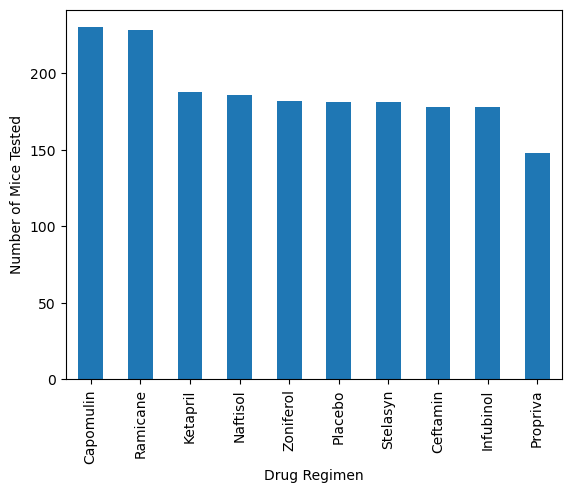

In [150]:
timepoint = mouse_study_clean.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False)

timepoint.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested")
#plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
#plt.ylabel("Number of Mice Tested")
plt.show


Text(0, 0.5, 'Number of Mice Tested')

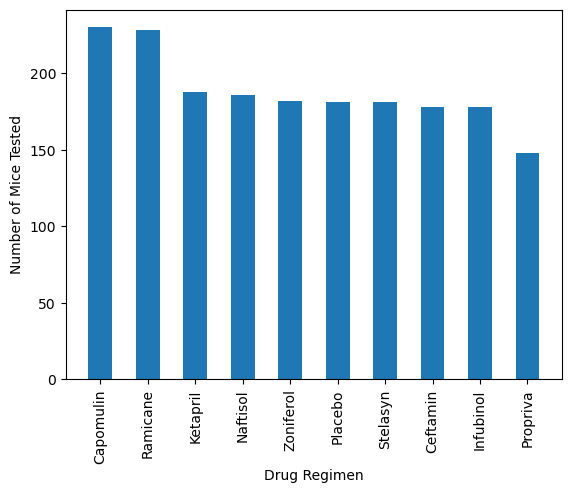

In [151]:
drug_regimen = timepoint.index
values = timepoint.values
plt.bar(drug_regimen, values, width = 0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

<Axes: ylabel='Sex'>

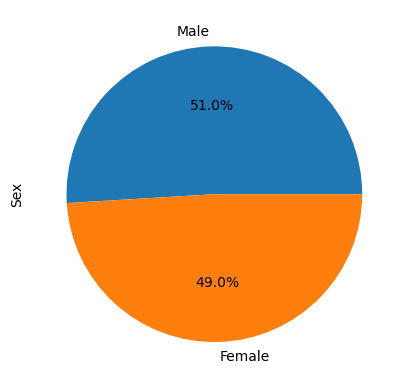

In [152]:
colors= ["blue", "orange"]
sex = mouse_study_clean["Sex"].value_counts()
plt.xlabel("")
sex.plot(kind="pie", autopct="%1.1f%%")


Text(0, 0.5, 'Sex')

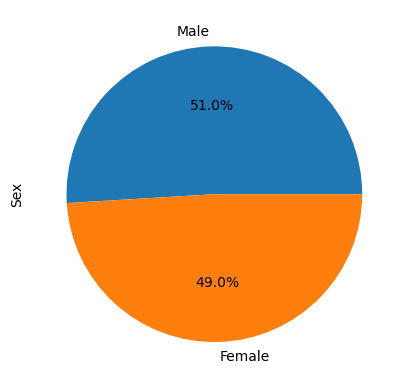

In [153]:
labels = ["Male", "Female"]
plt.pie(sex, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

# Quartiles, Outliers and Boxplots

In [154]:
final_timepoint = mouse_study_clean.groupby("Mouse ID").max()["Timepoint"]

final_timepoint = final_timepoint.reset_index()

final_timepoint_df = pd.merge(final_timepoint, mouse_study_clean, how="left", on=["Mouse ID", "Timepoint"])

final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [161]:
Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = []

iqr_drugs = []

for Drug in Drugs:
    tumor_drug = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == Drug,"Tumor Volume (mm3)"] 
    quartiles = tumor_drug.quantile([0.25, 0.5, 0.75])
   
    tumor_vol_data.append(tumor_drug)
    iqr_drugs.append(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_drug_outlier = tumor_drug.loc[(tumor_drug < lower_bound) | (tumor_drug >upper_bound)]

    print(f"{Drug}'s potential outliers: {tumor_drug_outlier}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


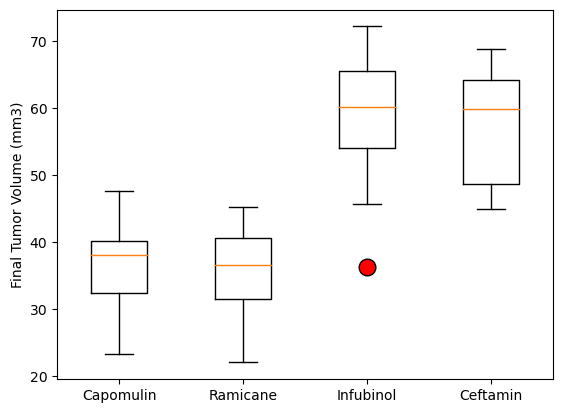

In [156]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=Drugs, flierprops={"markerfacecolor":"red", "markersize": 12})
plt.show()

# Line and Scatter Plot

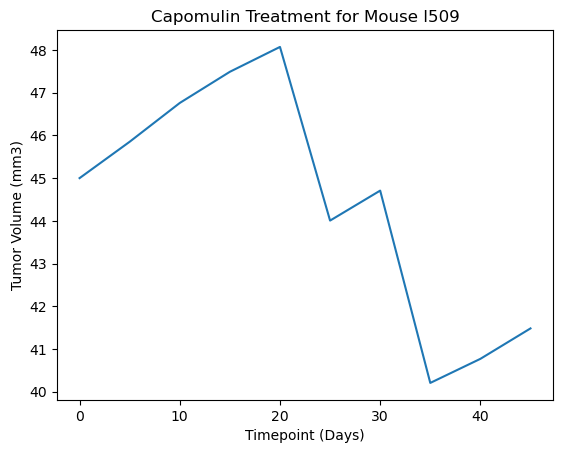

In [157]:
y_values = mouse_study_clean.loc[(mouse_study_clean["Mouse ID"] == 'l509'),'Tumor Volume (mm3)']
x_values = mouse_study_clean.loc[(mouse_study_clean["Mouse ID"] == 'l509'), 'Timepoint']

plt.plot(x_values, y_values)
plt.title("Capomulin Treatment for Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#x_values

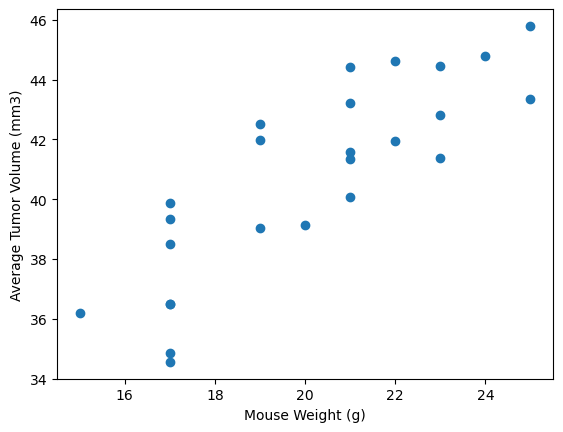

In [158]:
x_mouse_weight = mouse_study_clean[mouse_study_clean["Drug Regimen"] == 'Capomulin']
x_mouse_weight_avg = x_mouse_weight.groupby("Mouse ID").mean()

plt.scatter(x_mouse_weight_avg["Weight (g)"], x_mouse_weight_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


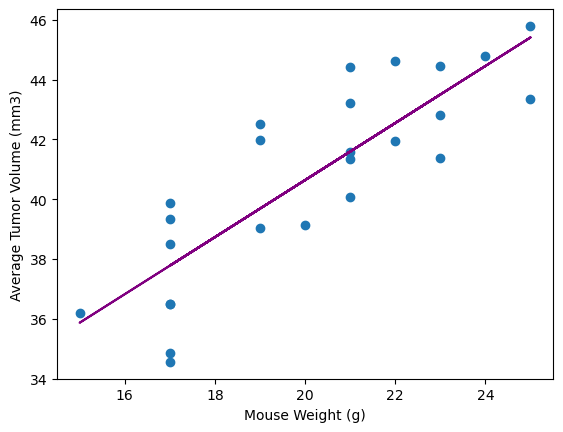

In [162]:
correlation = round(st.pearsonr(x_mouse_weight_avg["Weight (g)"], x_mouse_weight_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}.")

model = st.linregress(x_mouse_weight_avg["Weight (g)"], x_mouse_weight_avg["Tumor Volume (mm3)"])

y_values = x_mouse_weight_avg["Weight (g)"] * model[0] + model[1]

plt.scatter(x_mouse_weight_avg["Weight (g)"], x_mouse_weight_avg["Tumor Volume (mm3)"])
plt.plot(x_mouse_weight_avg["Weight (g)"], y_values, color="purple")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



# Analysis 

In [165]:
print("The weight of the mouse has a strong positive correlation with the average tumor volume of the mice.  When looking at a single mouse (l509) treated with the drug Capomulin , it appears that the drug did have a decreasing effect on the volume of the mouse's tumor. Of the four drugs (Capomulin, Ramicane, Infubinol, Ceftamin) that were inspected for normalness of the data at the final timepoint, only Inbuinol came back with a potential outlier for the tumor volume at the final timepoint. The boxplots seem to show that the drugs Capomulin and Ramicane had a smaller ending volume of the tumors than Inbuinol and Ceftamin did.") 

The weight of the mouse has a strong positive correlation with the average tumor volume of the mice.  When looking at a single mouse (l509) treated with the drug Capomulin , it appears that the drug did have a decreasing effect on the volume of the mouse's tumor. Of the four drugs (Capomulin, Ramicane, Infubinol, Ceftamin) that were inspected for normalness of the data at the final timepoint, only Inbuinol came back with a potential outlier for the tumor volume at the final timepoint. The boxplots seem to show that the drugs Capomulin and Ramicane had a smaller ending volume of the tumors than Inbuinol and Ceftamin did.
